In [58]:
import cv2
import dlib
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil
import numpy as np

In [59]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [60]:
import matplotlib.pyplot as plt

In [61]:
print(cv2.__version__)

4.5.5


In [62]:
print(dlib.__version__)

19.22.0


In [63]:
import matplotlib
import seaborn

In [64]:
imagem = cv2.imread("px-girl.jpg")

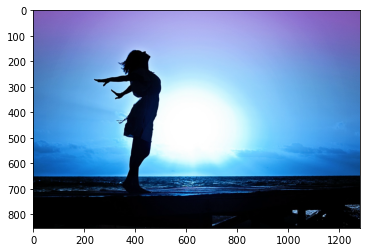

In [65]:
plt.imshow(imagem)

In [66]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

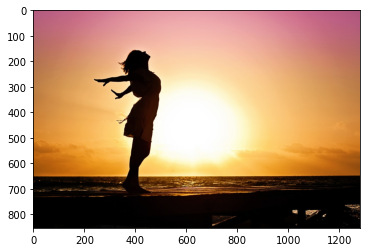

In [67]:
plt.imshow(imagem_rgb)

In [68]:
imagem2 = cv2.imread("px-people.jpg")
imagem2_rgb = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)

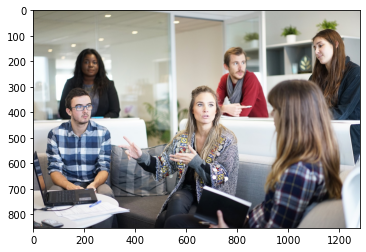

In [69]:
plt.imshow(imagem2_rgb)

In [70]:
#Verificar quantos pixels tem
#853 linhas e compriento 1280 linhas - 853*1280 = número de pixels, e 3 canais (r g b)

imagem2_rgb.shape

(853, 1280, 3)

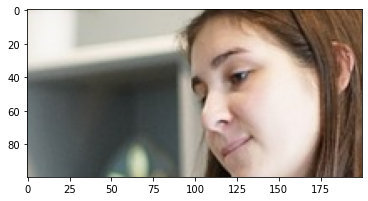

In [71]:
#Extrair região de interesse - fazendo recorte na imagem conforme escala

imagem_roi = imagem2_rgb[100:200, 1000:1200]
plt.imshow(imagem_roi)

In [72]:
imagem_roi_bgr = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
cv2.imwrite("imagem_roi.png", imagem_roi_bgr)

True

In [73]:
# Supondo que nosso objetivo é identificar um sorriso de uma pessoa, e que temos os classificadores de cascata de: pessoa de corpo inteiro, de rostos e sorrisos à nossa disposição, qual seria a melhor forma de classificação?
#  Neste caso, primeiro temos que ter certeza de que encontramos um rosto completo. A partir disso, identificar o sorriso.

Text(0.5, 1.0, 'Corpo inteiro')

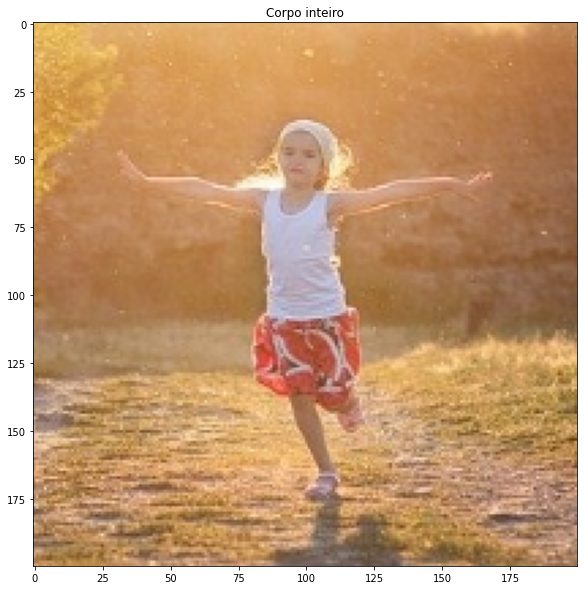

In [74]:
#Extrair corpo humano - SLICE NOTATION
imagem_teste = cv2.imread("1364-img0102.png")
imagem_teste_rgb = cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2RGB)

imagem_teste_roi = imagem_teste_rgb[200:400, 500:700]


plt.figure(figsize=(20,10))
plt.imshow(imagem_teste_roi)
plt.title("Corpo inteiro")

Text(0.5, 1.0, 'Corpo inteiro')

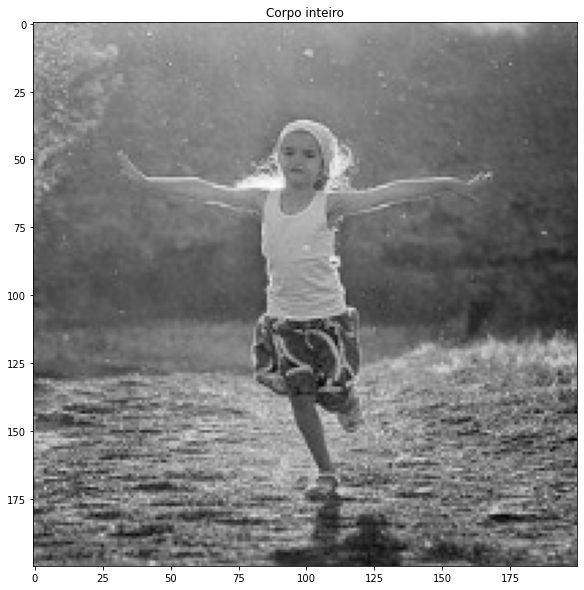

In [75]:
roi_gray = cv2.cvtColor(imagem_teste_roi, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20,10))
plt.imshow(roi_gray, cmap="gray")
plt.title("Corpo inteiro")


In [76]:
roi_rgb = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2RGB)

imagem_teste_rgb[200:400, 500:700] = roi_rgb

Text(0.5, 1.0, 'Corpo inteiro')

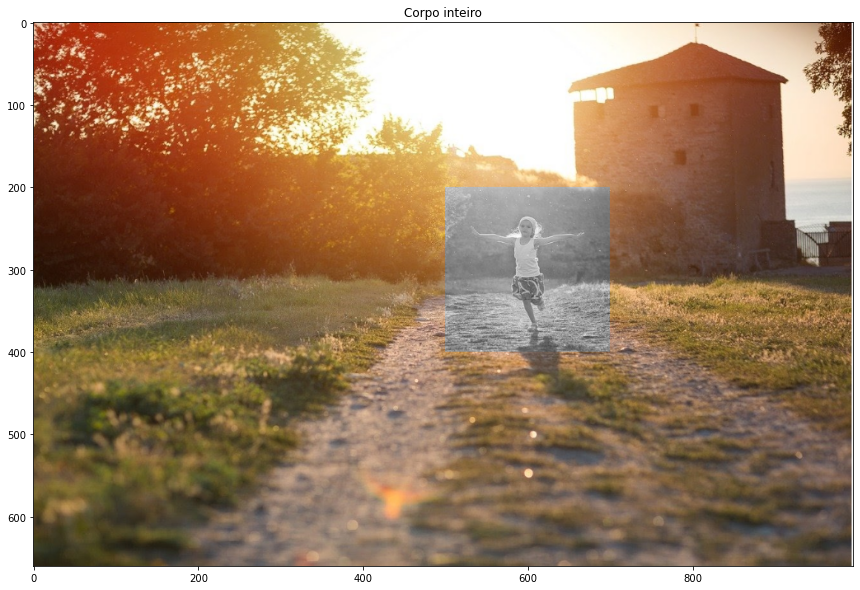

In [77]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_teste_rgb)
plt.title("Corpo inteiro")

# Classificador de cascata de Haar
###### O classificador trabalha com imagens na escala de cinza, então primeiro passo é fazer essa conversão

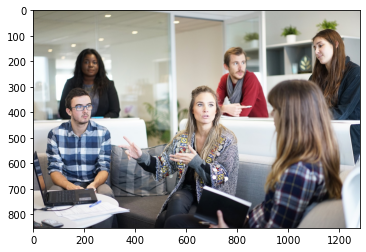

In [78]:
plt.imshow(imagem2_rgb)

In [79]:
imagem_gray = cv2.cvtColor(imagem2_rgb, cv2.COLOR_RGB2GRAY)

In [80]:
pathfile_haar = "C:/opencv_3.0/opencv/build/etc/haarcascades/haarcascade_frontalface_default.xml"

#classificador = cv2.CascadeClassifier("classificadores/haarcascade_frontalface_default_xml")


endereco_classificador = r'C:\Users\letic\anaconda3\pkgs\opencv-3.4.3-py36h597e314_201\Library\etc\haarcascades\haarcascade_frontalface_default.xml'
classificador = cv2.CascadeClassifier(endereco_classificador)

In [81]:
#1.3 = significa que dada uma imagem, a gente vai diminuri ela até o limite que o modelo foi construido. vai reduzir a imagem a 30% e vai diminuindo, até encontrar rostos
#5 = numero minimo de caracteristicas vizinhas que ele vai considerar,
#Verificar quantos rostos ele consegue extrair da imagem

faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)

In [82]:
len(faces)

5

In [83]:
faces[0]

array([1088,  102,  101,  101])

In [84]:
imagem_anotada = imagem2_rgb.copy()

In [85]:
#fazer anotação na imagem original, pois já tenho a escala - extrair colorida
#(255,255,0) - cor amarela
#2 - espessura do retangulo

for (x,y,w,h) in faces:
    cv2.rectangle(imagem_anotada, (x,y), (x+w, y+h), (255, 255, 0), 2)


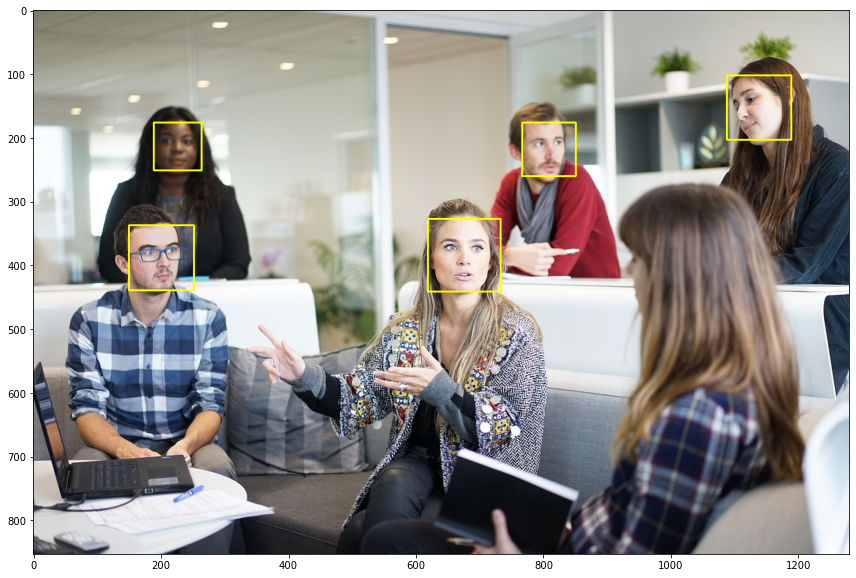

In [86]:
plt.figure(figsize = (20,10))
plt.imshow(imagem_anotada)

In [87]:
#criando contador, para cada face que eu identificar(x,y,w,h)

face_imagem = 0

for (x,y,w,h) in faces:
    #primeiro rosto identificado seria 1, segundo rosto seria 2...
    face_imagem += 1
    
    #slice notation
    imagem_roi = imagem2_rgb[y:y+h, x:x+w]
    
    #convertendo para BGR
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    
    #SALVANDO COMO ARQUIVO DINÂMICO
    cv2.imwrite("face_" + str(face_imagem) + ".png", imagem_roi)
    

### Exercício

# Aula 03 - Classificação de faces

In [88]:
#Agora vamos começar a trabalhar no processo de classificação de faces, no sentido de dada uma face - quem ela é? Ela é o Michel, ela é o José, ela é a Maria, por exemplo.

In [89]:
imagem_face_1 = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("imagens/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("imagens/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

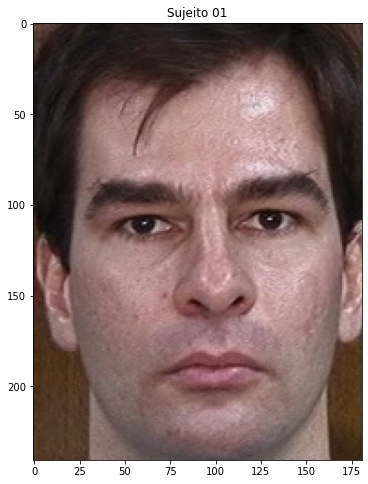

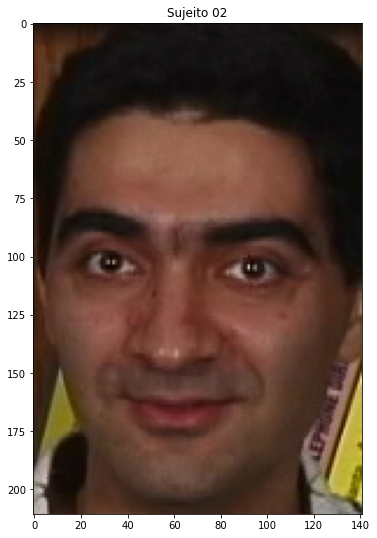

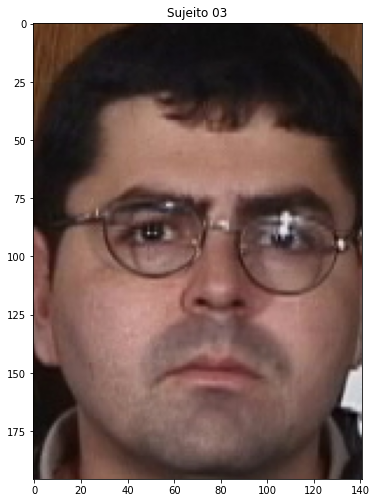

In [90]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)

plt.figure(figsize=(20,10))
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)

plt.figure(figsize=(20,10))
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)


plt.show()

In [91]:
imagem_face_1.shape

(241, 181, 3)

In [92]:
imagem_face_2.shape

(211, 141, 3)

In [93]:
imagem_face_3.shape

(196, 141, 3)

In [94]:
#As imagens tem tamanhos diferentes, precisamos normalizar deixando com mesmo tamanho

In [95]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [96]:
len(lista_arq_faces)

750

In [97]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)  

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [98]:
#Redimensionamento e cores na escala de cinza

def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [99]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))] 
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))] 

In [100]:
lista_faces_treino[0]

's01_01.jpg'

In [101]:
lista_faces_teste[0]

's01_11.jpg'

In [102]:
dados_treinamento, sujeitos = [], []

for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))
    
    

In [103]:
len(dados_treinamento)

500

In [104]:
len(sujeitos)

500

In [105]:
dados_teste, sujeitos_teste = [], []

for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [106]:
len(dados_teste)

250

In [107]:
len(sujeitos_teste)

250

Text(0.5, 1.0, '5')

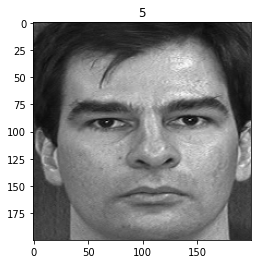

In [108]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

# Classificação de Eigenfaces

In [109]:
#Antes de começar, é preciso converter a lista de sujeitos, ou labels, para formato array de 32bits.

In [110]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [111]:
modelo_eigenfaces = cv2.face.EigenFaceRecognizer_create()

In [119]:
modelo_eigenfaces.predict(dados_teste[15])

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv_contrib\modules\face\src\eigen_faces.cpp:117: error: (-2:Unspecified error) This Eigenfaces model is not computed yet. Did you call Eigenfaces::train? in function 'cv::face::Eigenfaces::predict'


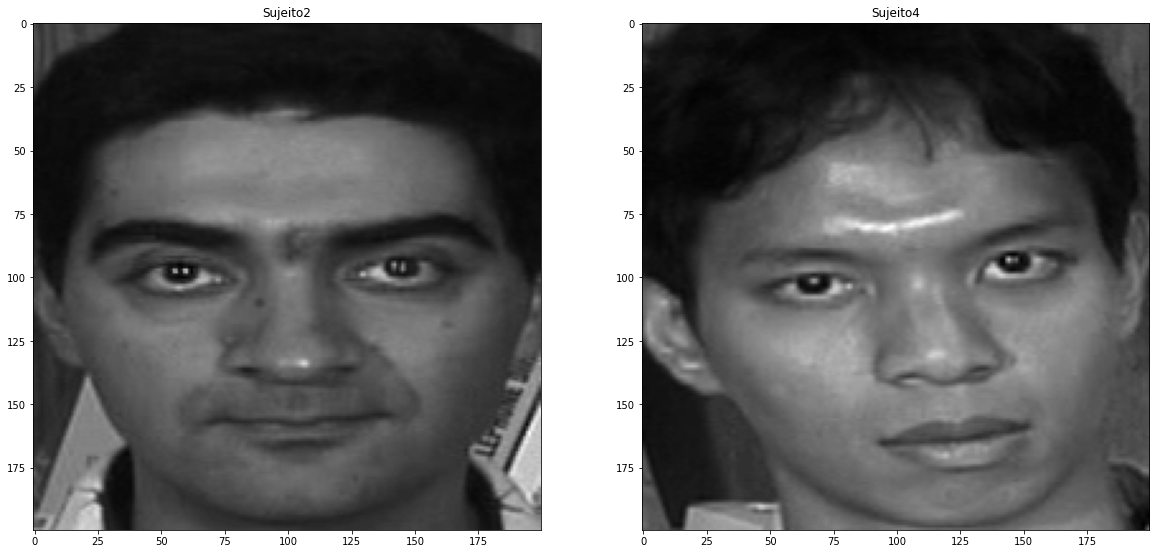

In [113]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito" + str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap="gray")

plt.subplot(122)
plt.title("Sujeito" + str(sujeitos_teste[15]))
plt.imshow(dados_teste[15], cmap="gray")

plt.show()

In [117]:
predicao = modelo_eigenfaces.predict(dados_teste[7])
predicao

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv_contrib\modules\face\src\eigen_faces.cpp:117: error: (-2:Unspecified error) This Eigenfaces model is not computed yet. Did you call Eigenfaces::train? in function 'cv::face::Eigenfaces::predict'


In [ ]:
pathfile_haar = "C:/opencv_3.0/opencv/build/etc/haarcascades/haarcascade_frontalface_default.xml"

#classificador = cv2.CascadeClassifier("classificadores/haarcascade_frontalface_default_xml")


endereco_classificador = r'C:\Users\letic\anaconda3\pkgs\opencv-3.4.3-py36h597e314_201\Library\etc\haarcascades\haarcascade_frontalface_default.xml'
classificador = cv2.CascadeClassifier(endereco_classificador)

In [133]:
import cv2

endereco_classificador_face = r'C:\Users\letic\anaconda3\pkgs\opencv-3.4.3-py36h597e314_201\Library\etc\haarcascades\haarcascade_frontalface_default.xml'
endereco_classificador_eye = r'C:\Users\letic\anaconda3\pkgs\opencv-3.4.3-py36h597e314_201\Library\etc\haarcascades\haarcascade_eye.xml'
endereco_classificador_smile = r'C:\Users\letic\anaconda3\pkgs\opencv-3.4.3-py36h597e314_201\Library\etc\haarcascades\haarcascade_smile.xml'


# Carregar modelos
face_cascade = cv2.CascadeClassifier(endereco_classificador_face)
eye_cascade = cv2.CascadeClassifier(endereco_classificador_eye)
smile_cascade = cv2.CascadeClassifier(endereco_classificador_smile)

cap = cv2.VideoCapture(0)

while(True):

    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    eye = eye_cascade.detectMultiScale(gray, 1.8, 5)
    smile = smile_cascade.detectMultiScale(gray, 1.8, 20)

    for (x,y,w,h) in faces:
        gray = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(gray,'FACE',(x, y-10), font, 0.5, (11,255,255), 2, cv2.LINE_AA)
        roi_gray = gray[y:y+h, x:x+w]

    for (x,y,w,h) in eye:
        gray = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(gray,'eye',(x, y-10), font, 0.5, (11,255,255), 2, cv2.LINE_AA)
        roi_gray = gray[y:y+h, x:x+w]
        
    for (x,y,w,h) in smile:
        gray = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(gray,'smile',(x, y-10), font, 0.5, (11,255,255), 2, cv2.LINE_AA)
        roi_gray = gray[y:y+h, x:x+w]

    cv2.imshow('black and white',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 